In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import pylab as plt

### Question 1

In [2]:
data = pd.read_csv('./datasets/tesla-stock-price.csv')

In [3]:
price = (0.5*(data['high']+data['low'])).values

(0, 757)

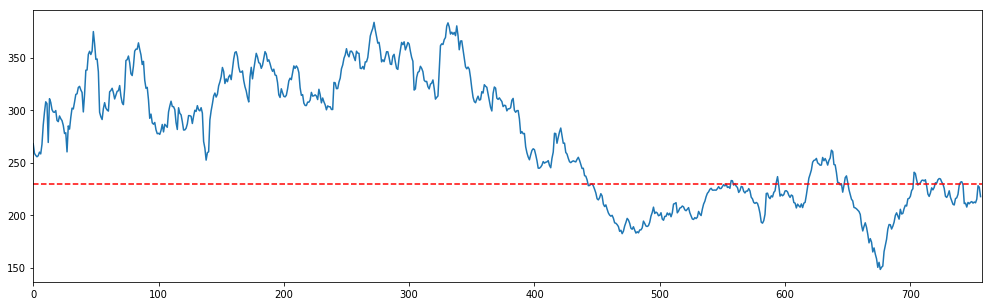

In [4]:
p0 = 230

fig,ax = plt.subplots(1,1,figsize=(17,5))
ax.plot(price)
ax.plot([0,len(price)],[p0,p0],'r--')
plt.xlim(0,len(price))

In [5]:
p0 = 230
price_p = price+0
price_p[price>p0] = 0
price_p[price<=p0] = 1

10


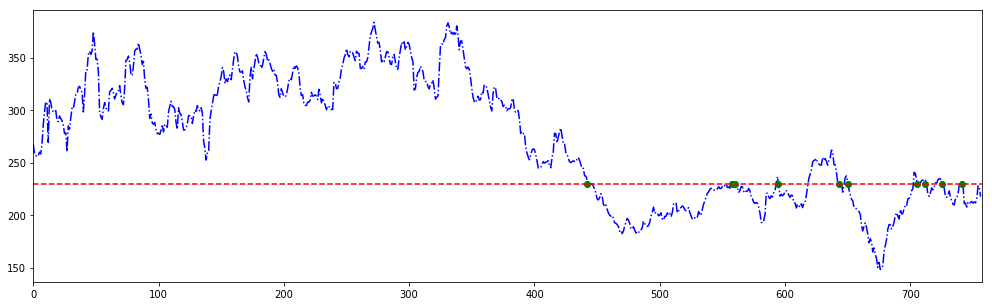

In [6]:
num = 0
pos = []
for i in range(len(price_p)-1):
    if price_p[i]<price_p[i+1]:
        num += 1
        pos.append(i)
print(num)

fig,ax = plt.subplots(1,1,figsize=(17,5))
ax.plot(price,'b-.')
ax.plot(pos,len(pos)*[p0],'go')
ax.plot([0,len(price)],[p0,p0],'r--')
plt.xlim(0,len(price));

10


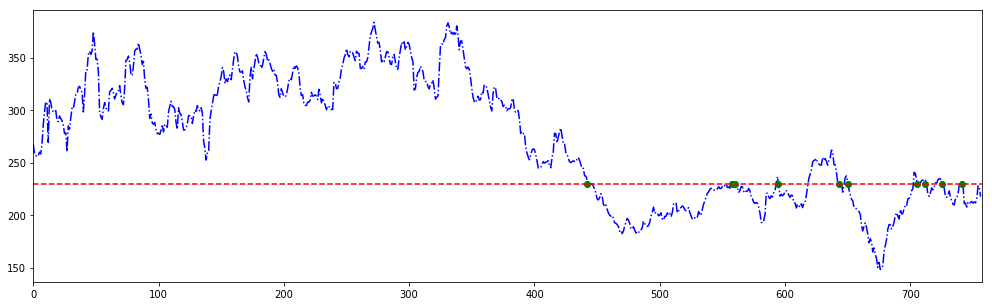

In [7]:
diff = np.diff(price_p)
num = np.sum(diff==1)
print(num)

pos = np.argwhere(diff==1).reshape(-1)
fig,ax = plt.subplots(1,1,figsize=(17,5))
ax.plot(price,'b-.')
ax.plot(pos,len(pos)*[p0],'go')
ax.plot([0,len(price)],[p0,p0],'r--')
plt.xlim(0,len(price));

### Question 2

In [8]:
data = pd.read_csv('./datasets/significant-earthquakes.csv').drop(columns=['Year','Code'])

In [9]:
sig_eq = data.groupby('Entity').sum()
print('list of coutries:')
data['Entity'].drop_duplicates().values

list of coutries:


array(['Afghanistan', 'Albania', 'Algeria', 'Antarctica',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Atlantic Ocean',
       'Australia', 'Austria', 'Azerbaijan', 'Azores', 'Bangladesh',
       'Barbados', 'Belgium', 'Bering Sea', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'British Virgin Islands',
       'Bulgaria', 'Burundi', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'China', 'Colombia', 'Congo',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Eritrea', 'Ethiopia', 'Fiji', 'France',
       'French Guiana', 'French Polynesia', 'Gabon', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Grenada', 'Guadeloupe', 'Guatemala', 'Guinea',
       'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indian Ocean',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kaza

In [10]:
country_name = 'Afghanistan'
print(sig_eq.loc[country_name]['Number of significant earthquakes (significant earthquakes)'])

56


### Question 3

In [2]:
data = pd.read_csv('./datasets/su5m.csv')

In [3]:
data['boys'] = data['m1990']+data['m2000']+data['m2010']+data['m2015']+data['m2017']
data['girls'] = data['f1990']+data['f2000']+data['f2010']+data['f2015']+data['f2017']

In [4]:
data = data.drop(columns=['m'+str(i) for i in [1990,2000,2010,2015,2017]]+
                  ['f'+str(i) for i in [1990,2000,2010,2015,2017]]+
                  ['Unnamed: 0','ccode']).set_index('country')

In [5]:
data.head()

,boys,girls
country,,
Afghanistan,556.8,511.5
Albania,103.0,86.3
Algeria,177.0,153.8
Andorra,26.6,21.9
Angola,763.7,676.5


In [6]:
print('list of coutries:')
data.index.values

list of coutries:


array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Cabo Verde', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Democratic Republic of the Congo',
       'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia',
       'Micronesia (Federated States of)', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany',

In [7]:
country_list = ['Afghanistan', 'Albania', 'Algeria']
ratios = []
for i in country_list:
    dd = data.loc[i]
    ratios.append(dd['girls']/dd['boys'])

In [9]:
np.mean(ratios)

0.8751442909071766

### Question 4

In [11]:
migrants = pd.read_csv('./datasets/migrants.csv').drop(columns=['Unnamed: 0','ccode','percentarea','number1000'])
gdp = pd.read_csv('./datasets/2014_world_gdp_with_codes.csv').rename(columns={'COUNTRY':'country'})
gdp = gdp.drop(columns=['CODE'])

In [12]:
data = migrants.merge(gdp,on='country').drop(columns=['country'])

In [13]:
maxgdp = 10
fdata = data[data['GDP (BILLIONS)']<maxgdp]

In [14]:
result = fdata['under18'].values.astype(float).mean()
result

21.71153846153846

In [65]:
def question4(maxgdp):
    fdata = data[data['GDP (BILLIONS)']<maxgdp]
    return fdata['under18'].values.astype(float).mean()

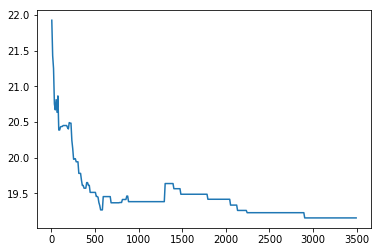

In [70]:
x = np.arange(5,3500,10)
y = []
for i in x:
    y.append(question4(i))
plt.plot(x,y)

Less GDP encourages youth to migrate!